In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
data= pd.read_csv("C:\\Users\\SUHAS R S\\Downloads\\Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
##To check number of rows and columns
data.shape

(10000, 14)

In [5]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.isnull().values.any()

False

In [7]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
## To get the columns containing textual data
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

print("Non-Numeric Columns:")
print(non_numeric_columns)

Non-Numeric Columns:
Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [10]:
data=data.drop(['Surname','CustomerId','RowNumber'],axis=1)

In [11]:
# Columns containing textual data
categorical_columns = ['Geography', 'Gender']

# Label Encoding: Convert categorical values into numerical labels
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


In [12]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [14]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Text(0, 0.5, 'count')

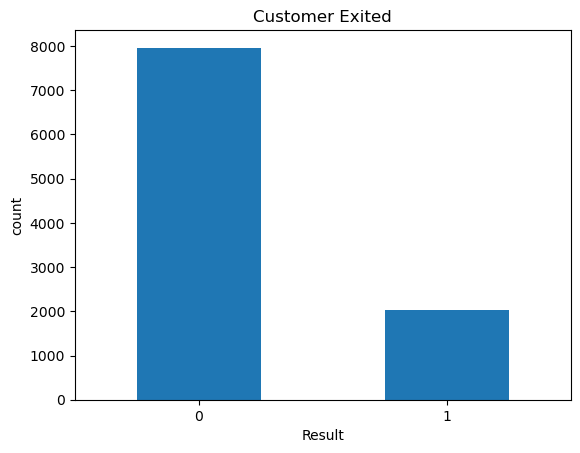

In [16]:
## 0-Not Exited, 1- Exited
import matplotlib.pyplot as plt
LABELS={'Not Exited,Exited'}
count_classes=pd.value_counts(data['Exited'],sort=True)

count_classes.plot(kind="bar", rot=0)

plt.title("Customer Exited")


plt.xlabel("Result")

plt.ylabel("count")


In [17]:
x=data.drop('Exited',axis=1)
y=data['Exited']

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [19]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pred1=log.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.805

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test,y_pred1)


0.5858585858585859

In [24]:
recall_score(y_test,y_pred1)

0.14250614250614252

In [25]:
f1_score(y_test,y_pred1)

0.22924901185770755

### The data set contains high imbalance data, so balancing need to be done using SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
x_res, y_res=SMOTE().fit_resample(x,y)

In [27]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# Logistic Regression

In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [31]:
log.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred1=log.predict(x_test)

In [33]:
accuracy_score(y_test,y_pred1)

0.6629001883239172

In [34]:
precision_score(y_test,y_pred1)

0.6443640747438216

In [35]:
recall_score(y_test,y_pred1)

0.6883451384417257

In [36]:
f1_score(y_test,y_pred1)

0.665628891656289

# SVC

In [37]:

from sklearn import svm
svm=svm.SVC()
svm.fit(x_train,y_train)

SVC()

In [38]:
y_pred2=svm.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred2)

0.5684243565599498

In [40]:
precision_score(y_test,y_pred2)

0.5412037037037037

# KneighborClassifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
y_pred3= knn.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred3)

0.6770244821092278

In [44]:
precision_score(y_test,y_pred3)

0.6411637931034483

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
y_pred4= rf.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred4)

0.8603264281230383

In [48]:
precision_score(y_test,y_pred4)

0.84625

In [49]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','RF'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4)]})

In [50]:
final_data

,Models,ACC
0,LR,0.662900
1,SVC,0.568424
2,KNN,0.677024
3,RF,0.860326


In [51]:
final_data1=pd.DataFrame({'Models':['LR','SVC','KNN','RF'],
                        'PRE':[precision_score(y_test,y_pred1),
                              precision_score(y_test,y_pred2),
                              precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred4)]})

In [52]:
final_data1

,Models,PRE
0,LR,0.644364
1,SVC,0.541204
2,KNN,0.641164
3,RF,0.846250


# Save the model

In [53]:
x_res=sc.fit_transform(x_res)
rf.fit(x_res,y_res)

RandomForestClassifier()

In [54]:
import joblib
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [55]:
model=joblib.load('churn_predict_model')

In [56]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Predicting the customer churn. 0-Not Exited , 1-Exited

In [59]:
model.predict([[608,2,0,41,1,83807.86,1,0,1,112542.58]])

array([0], dtype=int64)